<a href="https://colab.research.google.com/github/shreya227/Cryptocurrency-analysis/blob/main/Cryptocurrency_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **EDA of Top 5 Cryptocurrencies**

##### Cryptocurrency analysis and predictions have been sought after due to the increasing values of these crypto coins since their inception. Cryptocurrency prediction and price analysis has emerged one of the popular trends in the prognostication domain. Prediction of future prices of cryptocurrencies using past data is possible with the help of statistical tools and techniques. The aim of this research is divided into two parts. The first part is to determine to what magnitude (positive/negative) are the different cryptocurrency prices (Bitcoin, Ethereum, Binance coin, Tether, and Ripple) correlated with each other, measured using statistical techniques Pearson correlation coefficients and To what extent can the prices of the different cryptocurrencies (Bitcoin, Ethereum, Binance coin, Tether, and Ripple) be predicted using Facebook prophet since the significance of forecasting can be deemed one of the essential factors when gaining an edge in any kind of investment. The second part of the research deals with the risk and returns associated with these top 5 currencies since the skyrocketing price rise of cryptocurrencies, investors lookingforward to a right opportunity to invest in this new age digital money which is now a commodity.

In [ ]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
from google.colab import files
files.upload()

Saving Top Cryptos.xlsx to Top Cryptos.xlsx


{'Top Cryptos.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x009+\xc3d\xda\x01\x00\x00\x03\r\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

## **1. Bitcoin(BTC)**

In [ ]:
btc = pd.read_excel("Top Cryptos.xlsx", sheet_name='BTC')
btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3226249984
1,2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5208249856
2,2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4908680192
3,2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8957349888
4,2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920


In [ ]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1514 non-null   datetime64[ns]
 1   Open       1514 non-null   float64       
 2   High       1514 non-null   float64       
 3   Low        1514 non-null   float64       
 4   Close      1514 non-null   float64       
 5   Adj Close  1514 non-null   float64       
 6   Volume     1514 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 82.9 KB


In [ ]:
btc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1514.000000,1514.000000,1514.000000,1514.000000,1514.000000,1.514000e+03
mean,18139.428074,18636.168496,17591.256909,18162.006082,18162.006082,2.519383e+10
std,17492.050265,17976.381914,16935.026676,17499.021425,17499.021425,2.101770e+10
min,3236.274658,3275.377930,3191.303467,3236.761719,3236.761719,2.923670e+09
25%,7181.180786,7321.211914,6937.704956,7179.667114,7179.667114,7.718671e+09
50%,9518.586914,9690.545410,9305.465332,9521.063476,9521.063476,2.115197e+10
75%,22422.617188,23541.645508,21928.194336,22804.642090,22804.642090,3.580401e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [ ]:
btc["Month"] = btc["Date"].dt.month
btc["Year"] = btc["Date"].dt.year
btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year
0,2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3226249984,11,2017
1,2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5208249856,11,2017
2,2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4908680192,11,2017
3,2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8957349888,11,2017
4,2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920,11,2017


In [ ]:
px.area(btc, x= 'Date', y= 'Close', title="Bitcoin's price Growth over the years")

**we can see price of Bitcoin incremented until early 2021. the price of Bitcoin was around 7000 in Nov 2017  And one year later, in 2019 the price again fell to a mere 3500. just after in June 2019 since then, the price of Bitcoin is in the increasing trend.**

Year
2017    12283.936413
2018     7572.298947
2019     7395.246282
2020    11116.378092
2021    47436.932021
Name: Close, dtype: float64


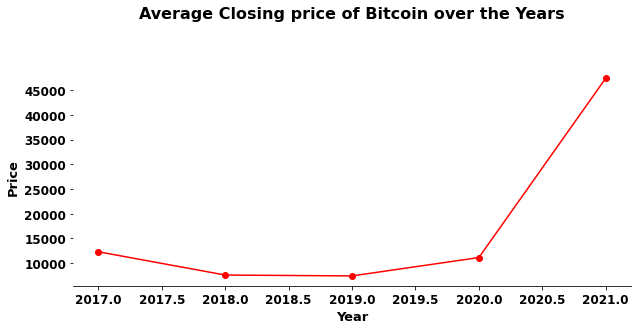

In [ ]:

df = btc.groupby(['Year']).mean()['Close']
print(df)
  
# plot the result using matplotlib
plt.figure(figsize=(10, 4))
df.plot(marker="o", color="Red")
sns.set_style('whitegrid')
sns.despine(left=True)
plt.title('Average Closing price of Bitcoin over the Years', fontsize=16, fontweight='bold', pad=50)
plt.xlabel('Year',fontsize=13, fontweight='bold')
plt.xticks(rotation=0,fontsize=12, fontweight='bold')
plt.ylabel('Price',fontsize=13, fontweight='bold')
plt.yticks(rotation=0,fontsize=12, fontweight='bold')
plt.show()

In [ ]:
px.violin(btc, y='Close',width=1000, height=550)

Text(0, 0.5, 'year')

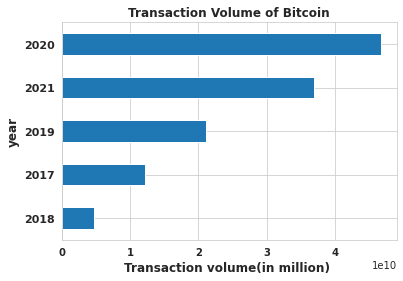

In [ ]:
ax = btc.groupby(['Year']).last()['Volume'].sort_values(ascending=False).head(10).sort_values().plot(kind='barh')
#ax.set_xlabel("Transaction Volume (in million)")
plt.title("Transaction Volume of Bitcoin",fontsize=12,fontweight='bold') 
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xlabel('Transaction volume(in million) ',fontsize=12, fontweight='bold')
plt.ylabel('year', fontsize=12, fontweight='bold')

## Highest transaction volume for Bitcoin has been recorded in year 2020

In [ ]:
btc= btc.rename(columns={"Date":"ds", "Close":"y"})
btc
m = Prophet()
m.fit(btc)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=150)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1659,2022-05-26,55214.600692,47879.186124,62740.453461
1660,2022-05-27,55112.132359,48014.850263,62582.639559
1661,2022-05-28,55036.861765,47710.431897,62183.130630
1662,2022-05-29,54905.552602,47678.355711,62127.138884
1663,2022-05-30,54819.183314,47410.061955,61986.164686


Text(0.5, 1.0, 'Price prediction of Bitcoin for 150 days')

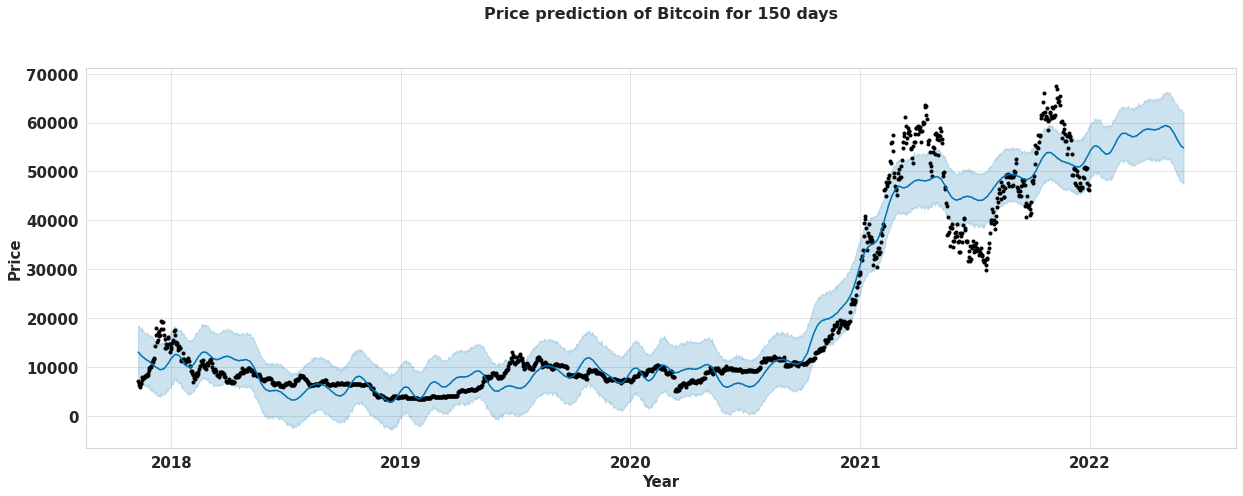

In [ ]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price', figsize=(17, 6))
plt.xticks(rotation=0,fontsize=15, fontweight='bold')
plt.ylabel('Price',fontsize=15, fontweight='bold')
plt.xlabel('Year',fontsize=15, fontweight='bold')
plt.yticks(rotation=0,fontsize=15, fontweight='bold')
plt.title('Price prediction of Bitcoin for 150 days', fontsize=16, fontweight='bold', pad=50)

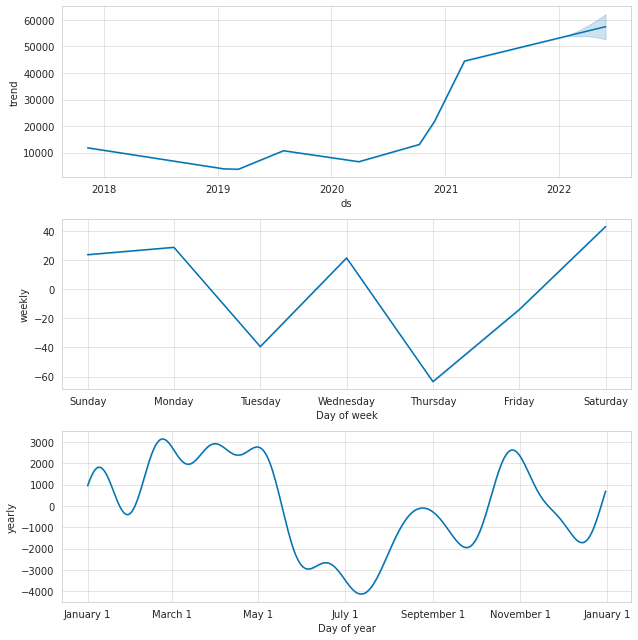

In [ ]:
figure1 = m.plot_components(forecast)

##**2. Ethereum(ETH)**

In [ ]:
eth = pd.read_excel("Top Cryptos.xlsx", sheet_name='ETH')
eth["Month"] = eth["Date"].dt.month
eth["Year"] = eth["Date"].dt.year
eth.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984,11,2017
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984,11,2017
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992,11,2017
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936,11,2017
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984,11,2017


In [ ]:
eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1514 non-null   datetime64[ns]
 1   Open       1514 non-null   float64       
 2   High       1514 non-null   float64       
 3   Low        1514 non-null   float64       
 4   Close      1514 non-null   float64       
 5   Adj Close  1514 non-null   float64       
 6   Volume     1514 non-null   int64         
 7   Month      1514 non-null   int64         
 8   Year       1514 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 106.6 KB


In [ ]:
eth.describe()

,Open,High,Low,Close,Adj Close,Volume,Month,Year
count,1514.000000,1514.000000,1514.000000,1514.000000,1514.000000,1.514000e+03,1514.000000,1514.000000
mean,921.227920,954.071439,884.668193,923.175039,923.175039,1.231976e+10,6.700132,2019.412814
std,1176.283832,1216.149296,1131.144983,1177.667120,1177.667120,1.146376e+10,3.515602,1.190675
min,84.279694,85.342743,82.829887,84.308296,84.308296,6.217330e+08,1.000000,2017.000000
25%,188.990917,194.329246,184.756275,189.240352,189.240352,2.888513e+09,4.000000,2018.000000
50%,360.173828,371.713989,351.629303,360.169433,360.169433,8.896970e+09,7.000000,2019.000000
75%,1050.762451,1126.990020,992.614624,1052.662445,1052.662445,1.791995e+10,10.000000,2020.000000
max,4810.071289,4891.704590,4718.039063,4812.087402,4812.087402,8.448291e+10,12.000000,2021.000000


In [ ]:
eth= eth.rename(columns={"Date":"ds", "Close":"y"})
eth.head()


,ds,Open,High,Low,y,Adj Close,Volume,Month,Year
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984,11,2017
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984,11,2017
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992,11,2017
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936,11,2017
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984,11,2017


In [ ]:
px.area(eth, x= 'ds', y= 'y', title="Ethereum's price Growth over the years")

Year
2017     532.086680
2018     483.507727
2019     181.770137
2020     307.542978
2021    2778.354149
Name: y, dtype: float64


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text major ticklabel objects>)

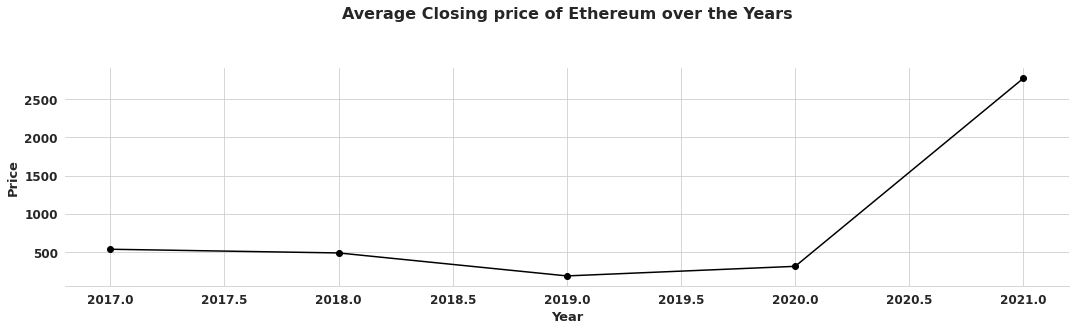

In [ ]:
eth_1 = eth.groupby(['Year']).mean()['y']
print(eth_1)

plt.figure(figsize=(18,4));
eth_1.plot(marker="o", color="Black")
sns.set_style('whitegrid')
sns.despine(left=True)
plt.title('Average Closing price of Ethereum over the Years', fontsize=16, fontweight='bold', pad=50)
plt.xlabel('Year',fontsize=13, fontweight='bold')
plt.xticks(rotation=0,fontsize=12, fontweight='bold')
plt.ylabel('Price',fontsize=13, fontweight='bold')
plt.yticks(rotation=0,fontsize=12, fontweight='bold')



In [ ]:
px.violin(eth, y='y',width=1000, height=550)

Text(0, 0.5, 'year')

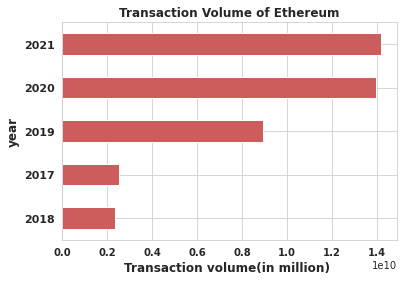

In [ ]:
bx = eth.groupby(['Year'])['Volume'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh', color='indianred')
#bx.set_xlabel("Transaction Volume (in million)")
plt.title("Transaction Volume of Ethereum",fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xlabel('Transaction volume(in million) ',fontsize=12, fontweight='bold')
plt.ylabel('year', fontsize=12, fontweight='bold') 

## Highest transation volume for Ethereum has been recorded in year 2021 followed by 2020

In [ ]:
m1 = Prophet()
m1.fit(eth)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future2 = m1.make_future_dataframe(periods=150)
forecast2 = m1.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1659,2022-05-26,6007.823015,5666.425549,6328.678305
1660,2022-05-27,5996.253599,5672.591583,6330.622115
1661,2022-05-28,5996.928257,5655.016022,6328.877078
1662,2022-05-29,5992.436889,5692.992540,6324.907652
1663,2022-05-30,5986.064981,5656.584726,6308.434113


Text(0.5, 1.0, 'Price prediction of Ethereum for 150 days')

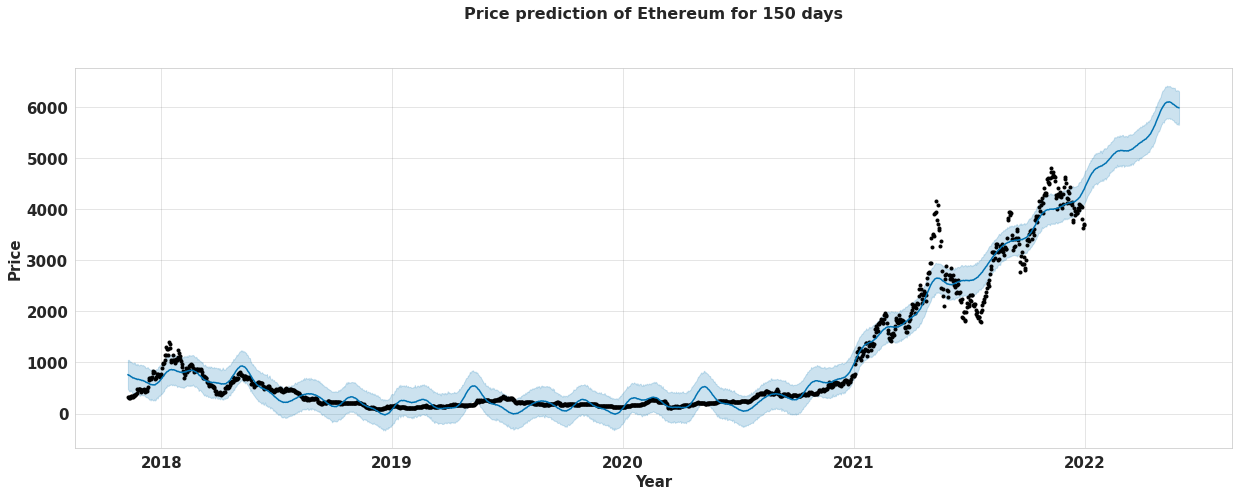

In [ ]:
figure3 = m1.plot(forecast2, xlabel='Date', ylabel='Price', figsize=(17, 6), uncertainty=True, plot_cap=True)
plt.xticks(rotation=0,fontsize=15, fontweight='bold')
plt.ylabel('Price',fontsize=15, fontweight='bold')
plt.xlabel('Year',fontsize=15, fontweight='bold')
plt.yticks(rotation=0,fontsize=15, fontweight='bold')
plt.title('Price prediction of Ethereum for 150 days', fontsize=16, fontweight='bold', pad=50)

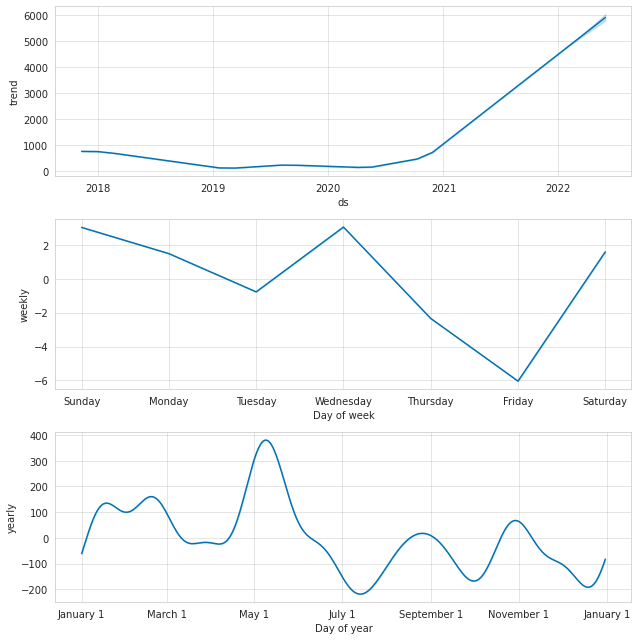

In [ ]:
figure4 = m1.plot_components(forecast2)

##**3. Binance Coin(BNB)**

In [ ]:
bnb = pd.read_excel("Top Cryptos.xlsx", sheet_name='BNB')
bnb["Month"] = bnb["Date"].dt.month
bnb["Year"] = bnb["Date"].dt.year
bnb.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year
0,2017-11-09,2.05314,2.17423,1.89394,1.99077,1.99077,19192200,11,2017
1,2017-11-10,2.00773,2.06947,1.64478,1.79684,1.79684,11155000,11,2017
2,2017-11-11,1.78628,1.91775,1.61429,1.67047,1.67047,8178150,11,2017
3,2017-11-12,1.66889,1.67280,1.46256,1.51969,1.51969,15298700,11,2017
4,2017-11-13,1.52601,1.73502,1.51760,1.68662,1.68662,12238800,11,2017


In [ ]:
bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1514 non-null   datetime64[ns]
 1   Open       1514 non-null   float64       
 2   High       1514 non-null   float64       
 3   Low        1514 non-null   float64       
 4   Close      1514 non-null   float64       
 5   Adj Close  1514 non-null   float64       
 6   Volume     1514 non-null   int64         
 7   Month      1514 non-null   int64         
 8   Year       1514 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 106.6 KB


In [ ]:
bnb.describe()

,Open,High,Low,Close,Adj Close,Volume,Month,Year
count,1514.000000,1514.000000,1514.000000,1514.000000,1514.000000,1.514000e+03,1514.000000,1514.000000
mean,103.726857,107.960741,99.249075,104.023839,104.023839,8.450956e+08,6.700132,2019.412814
std,175.411322,182.195941,167.955732,175.596498,175.596498,1.525226e+09,3.515602,1.190675
min,1.511360,1.582660,1.462560,1.510360,1.510360,9.284000e+03,1.000000,2017.000000
25%,12.735824,13.274196,12.147933,12.759650,12.759650,8.990496e+07,4.000000,2018.000000
50%,18.710361,19.565768,18.144334,18.736430,18.736430,2.488159e+08,7.000000,2019.000000
75%,34.934926,35.648267,33.519253,35.120632,35.120632,5.862341e+08,10.000000,2020.000000
max,676.315918,690.931946,634.549500,675.684082,675.684082,1.798295e+10,12.000000,2021.000000


In [ ]:
bnb= bnb.rename(columns={"Date":"ds", "Close":"y"})
bnb.head()
m2 = Prophet()
m2.fit(bnb)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
px.area(bnb, x= 'ds', y= 'y', title="Binance coin's price Growth over the years" )


Year
2017      3.483209
2018     11.172537
2019     20.092979
2020     21.350415
2021    378.304978
Name: y, dtype: float64


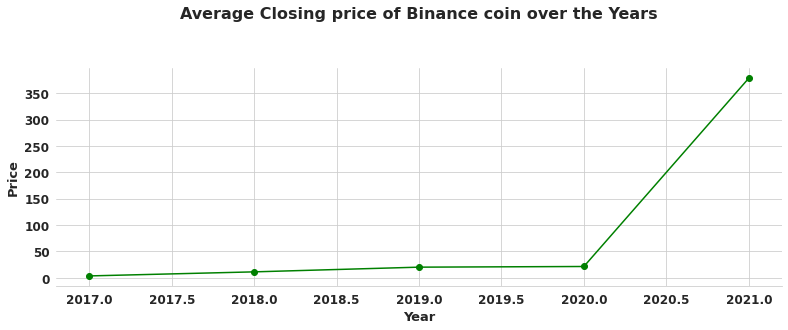

In [ ]:
bnb_1 = bnb.groupby(['Year']).mean()['y']
print(bnb_1)

plt.figure(figsize=(13, 4))
bnb_1.plot(marker="o", color="Green")
sns.set_style('whitegrid')
sns.despine(left=True)
plt.title('Average Closing price of Binance coin over the Years', fontsize=16, fontweight='bold', pad=50)
plt.xlabel('Year',fontsize=13, fontweight='bold')
plt.xticks(rotation=0,fontsize=12, fontweight='bold')
plt.ylabel('Price',fontsize=13, fontweight='bold')
plt.yticks(rotation=0,fontsize=12, fontweight='bold')
plt.show()

In [ ]:
px.violin(bnb, y='y',width=1000, height=550)

Text(0, 0.5, 'year')

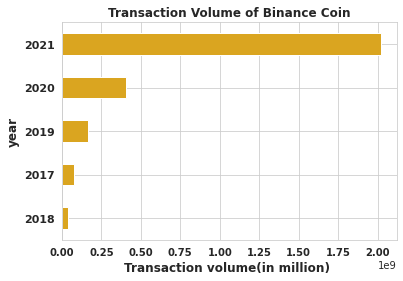

In [ ]:
cx = bnb.groupby(['Year'])['Volume'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh', color='goldenrod')
#cx.set_xlabel("Transaction Volume (in million)")
plt.title("Transaction Volume of Binance Coin", fontweight='bold', fontsize=12) 
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xlabel('Transaction volume(in million) ',fontsize=12, fontweight='bold')
plt.ylabel('year', fontsize=12, fontweight='bold')

### Highest trading volume for Binance Coin has been observed in the year 2021 

In [ ]:
future3 = m2.make_future_dataframe(periods=150)
forecast3 = m2.predict(future3)
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1659,2022-05-26,808.384407,742.216252,876.786882
1660,2022-05-27,807.733770,742.476710,877.435783
1661,2022-05-28,807.058525,736.785133,873.886057
1662,2022-05-29,806.791125,732.237120,875.552449
1663,2022-05-30,806.748427,736.255508,873.313652


Text(0.5, 1.0, 'Price prediction of Binance coin for 150 days')

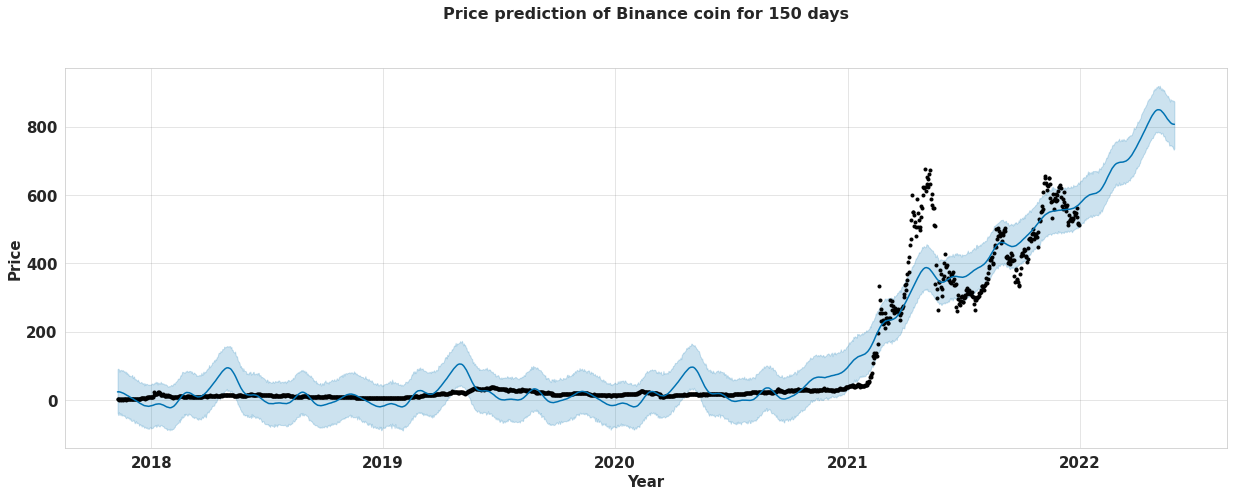

In [ ]:
figure5 = m2.plot(forecast3, xlabel='Date', ylabel='Price', figsize=(17, 6), uncertainty=True, plot_cap=True)
plt.xticks(rotation=0,fontsize=15, fontweight='bold')
plt.ylabel('Price',fontsize=15, fontweight='bold')
plt.xlabel('Year',fontsize=15, fontweight='bold')
plt.yticks(rotation=0,fontsize=15, fontweight='bold')
plt.title('Price prediction of Binance coin for 150 days', fontsize=16, fontweight='bold', pad=50)

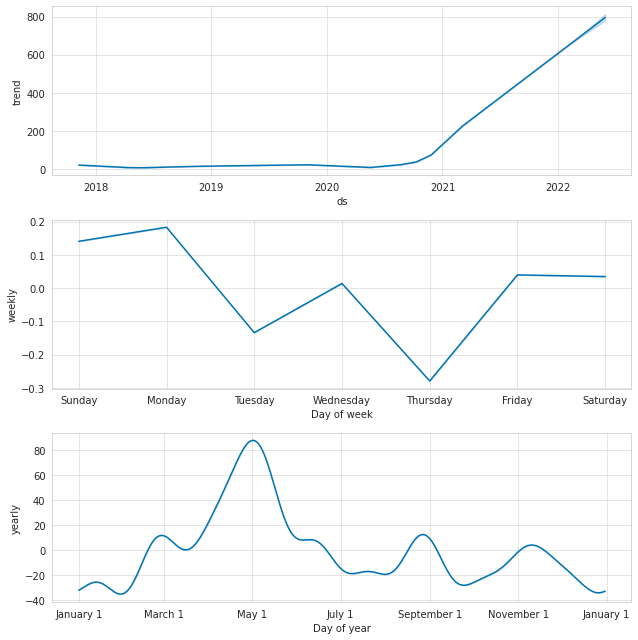

In [ ]:
figure6 = m2.plot_components(forecast3)

## **4. Tether (USDT)**

In [ ]:
usdt = pd.read_excel("Top Cryptos.xlsx", sheet_name='USDT')
usdt["Month"] = usdt["Date"].dt.month
usdt["Year"] = usdt["Date"].dt.year
usdt.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year
0,2017-11-09,1.01087,1.01327,0.996515,1.00818,1.00818,358188000,11,2017
1,2017-11-10,1.00650,1.02423,0.995486,1.00601,1.00601,756446016,11,2017
2,2017-11-11,1.00598,1.02621,0.995799,1.00899,1.00899,746227968,11,2017
3,2017-11-12,1.00602,1.10591,0.967601,1.01247,1.01247,1466060032,11,2017
4,2017-11-13,1.00448,1.02929,0.975103,1.00935,1.00935,767884032,11,2017


In [ ]:
usdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1514 non-null   datetime64[ns]
 1   Open       1514 non-null   float64       
 2   High       1514 non-null   float64       
 3   Low        1514 non-null   float64       
 4   Close      1514 non-null   float64       
 5   Adj Close  1514 non-null   float64       
 6   Volume     1514 non-null   int64         
 7   Month      1514 non-null   int64         
 8   Year       1514 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 106.6 KB


In [ ]:
usdt.describe()

,Open,High,Low,Close,Adj Close,Volume,Month,Year
count,1514.000000,1514.000000,1514.000000,1514.000000,1514.000000,1.514000e+03,1514.000000,1514.000000
mean,1.001972,1.009188,0.995729,1.001974,1.001974,3.829754e+10,6.700132,2019.412814
std,0.006345,0.010722,0.008498,0.006290,0.006290,4.060301e+10,3.515602,1.190675
min,0.972522,0.978690,0.899490,0.966644,0.966644,3.581880e+08,1.000000,2017.000000
25%,1.000010,1.001741,0.993367,1.000020,1.000020,3.843645e+09,4.000000,2018.000000
50%,1.000927,1.007177,0.997929,1.000863,1.000863,2.463844e+10,7.000000,2019.000000
75%,1.003570,1.012775,0.999879,1.003313,1.003313,5.732944e+10,10.000000,2020.000000
max,1.080950,1.105910,1.021830,1.077880,1.077880,2.790675e+11,12.000000,2021.000000


In [ ]:
usdt= usdt.rename(columns={"Date":"ds", "Close":"y"})
usdt.head()
m3 = Prophet()
m3.fit(usdt)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
px.area(usdt, x= 'ds', y= 'y', title="Tether's price Growth over the years")

Year
2017    1.010018
2018    1.000030
2019    1.004853
2020    1.001316
2021    1.000530
Name: y, dtype: float64


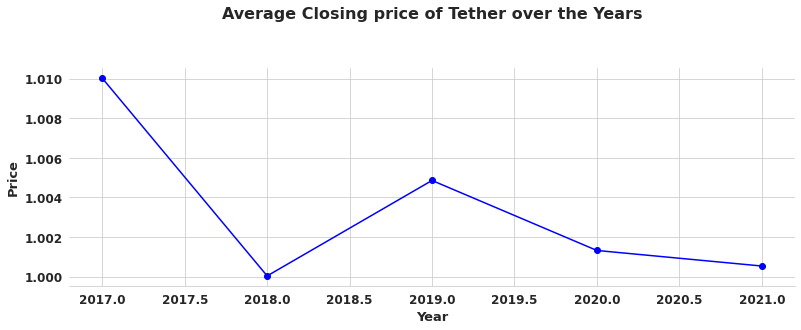

In [ ]:
usdt_1 = usdt.groupby(['Year']).mean()['y']
print(usdt_1)

plt.figure(figsize=(13, 4))
usdt_1.plot(marker="o", color="Blue")
sns.set_style('whitegrid')
sns.despine(left=True)
plt.title('Average Closing price of Tether over the Years', fontsize=16, fontweight='bold', pad=50)
plt.xlabel('Year',fontsize=13, fontweight='bold')
plt.xticks(rotation=0,fontsize=12, fontweight='bold')
plt.ylabel('Price',fontsize=13, fontweight='bold')
plt.yticks(rotation=0,fontsize=12, fontweight='bold')
plt.show()

In [ ]:
px.violin(usdt, y='y',width=1000, height=550)

Text(0, 0.5, 'year')

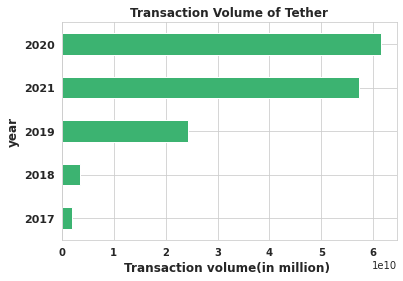

In [ ]:
dx = usdt.groupby(['Year']).last()['Volume'].sort_values(ascending=False).head(10).sort_values().plot(kind='barh', color='mediumseagreen')
#dx.set_xlabel("Transaction Volume (in million)")
plt.title("Transaction Volume of Tether", fontsize=12, fontweight='bold') 
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xlabel('Transaction volume(in million) ',fontsize=12, fontweight='bold')
plt.ylabel('year', fontsize=12, fontweight='bold')


In [ ]:
future4 = m3.make_future_dataframe(periods=150)
forecast4 = m3.predict(future4)
forecast4[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1659,2022-05-26,0.995906,0.977919,1.012668
1660,2022-05-27,0.995668,0.977158,1.011925
1661,2022-05-28,0.996056,0.977541,1.012513
1662,2022-05-29,0.995912,0.977170,1.012521
1663,2022-05-30,0.995588,0.977157,1.011581


Text(0.5, 1.0, 'Price prediction of Tether for 150 days')

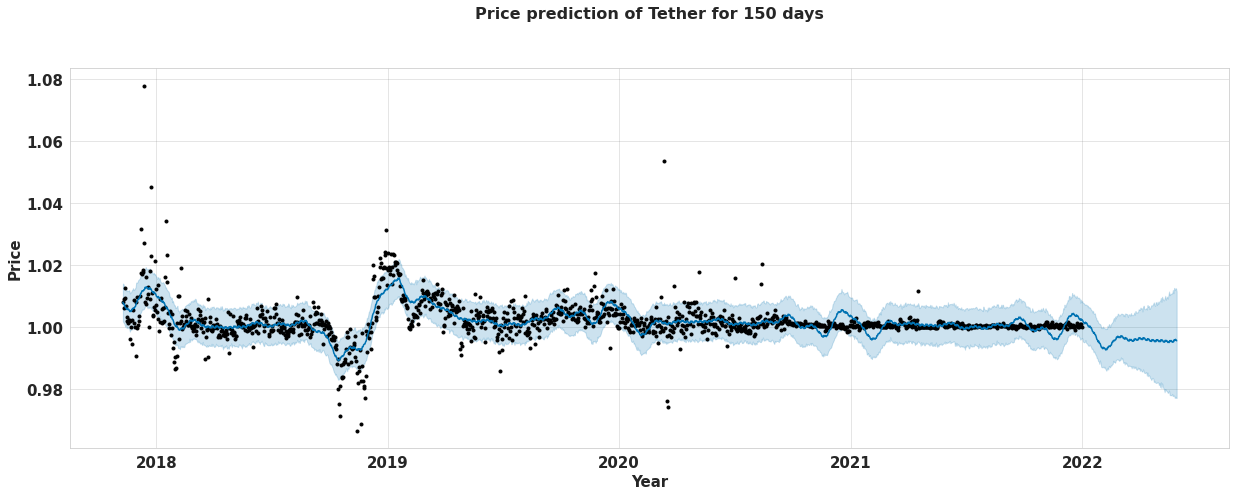

In [ ]:
figure7= m3.plot(forecast4, xlabel='Date', ylabel='Price', figsize=(17, 6), uncertainty=True, plot_cap=True)
plt.xticks(rotation=0,fontsize=15, fontweight='bold')
plt.ylabel('Price',fontsize=15, fontweight='bold')
plt.xlabel('Year',fontsize=15, fontweight='bold')
plt.yticks(rotation=0,fontsize=15, fontweight='bold')
plt.title('Price prediction of Tether for 150 days', fontsize=16, fontweight='bold', pad=50)

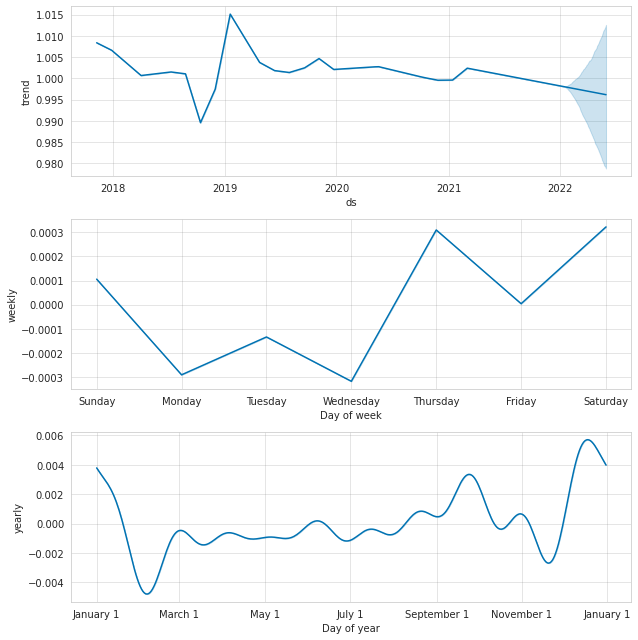

In [ ]:
figure8 = m3.plot_components(forecast4)

## **5. Ripple (XRP)**

In [ ]:
xrp = pd.read_excel("Top Cryptos.xlsx", sheet_name='XRP')
xrp["Month"] = xrp["Date"].dt.month
xrp["Year"] = xrp["Date"].dt.year
xrp.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year
0,2017-11-09,0.217911,0.221791,0.214866,0.217488,0.217488,147916992,11,2017
1,2017-11-10,0.218256,0.219068,0.205260,0.206483,0.206483,141032992,11,2017
2,2017-11-11,0.205948,0.214456,0.205459,0.210430,0.210430,134503008,11,2017
3,2017-11-12,0.210214,0.210214,0.195389,0.197339,0.197339,251175008,11,2017
4,2017-11-13,0.197472,0.204081,0.197456,0.203442,0.203442,132567000,11,2017


In [ ]:
xrp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1514 non-null   datetime64[ns]
 1   Open       1514 non-null   float64       
 2   High       1514 non-null   float64       
 3   Low        1514 non-null   float64       
 4   Close      1514 non-null   float64       
 5   Adj Close  1514 non-null   float64       
 6   Volume     1514 non-null   int64         
 7   Month      1514 non-null   int64         
 8   Year       1514 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 106.6 KB


In [ ]:
xrp.describe()

,Open,High,Low,Close,Adj Close,Volume,Month,Year
count,1514.000000,1514.000000,1514.000000,1514.000000,1514.000000,1.514000e+03,1514.000000,1514.000000
mean,0.526743,0.552133,0.500148,0.527156,0.527156,2.832142e+09,6.700132,2019.412814
std,0.396232,0.430107,0.362903,0.396213,0.396213,3.992777e+09,3.515602,1.190675
min,0.140524,0.146911,0.115093,0.139635,0.139635,1.002940e+08,1.000000,2017.000000
25%,0.260792,0.268981,0.253517,0.260853,0.260853,7.829543e+08,4.000000,2018.000000
50%,0.358596,0.373706,0.342977,0.359213,0.359213,1.609119e+09,7.000000,2019.000000
75%,0.664164,0.688408,0.635070,0.663158,0.663158,3.038895e+09,10.000000,2020.000000
max,3.363570,3.841940,3.117340,3.377810,3.377810,3.695518e+10,12.000000,2021.000000


In [ ]:
xrp= xrp.rename(columns={"Date":"ds", "Close":"y"})
xrp.head()
m4 = Prophet()
m4.fit(xrp)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
px.area(xrp, x= 'ds', y= 'y', title="Ripple's price Growth over the years")

Year
2017    0.575206
2018    0.666274
2019    0.309701
2020    0.258399
2021    0.868009
Name: y, dtype: float64


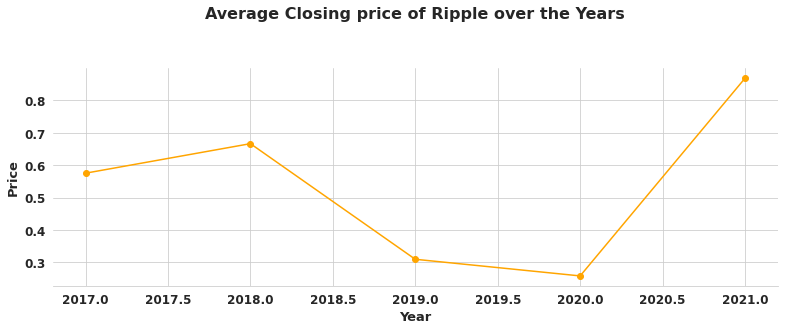

In [ ]:
xrp_1 = xrp.groupby(['Year']).mean()['y']
print(xrp_1)

plt.figure(figsize=(13, 4))
xrp_1.plot(marker="o", color="Orange")
sns.set_style('whitegrid')
sns.despine(left=True)
plt.title('Average Closing price of Ripple over the Years', fontsize=16, fontweight='bold', pad=50)
plt.xlabel('Year',fontsize=13, fontweight='bold')
plt.xticks(rotation=0,fontsize=12, fontweight='bold')
plt.ylabel('Price',fontsize=13, fontweight='bold')
plt.yticks(rotation=0,fontsize=12, fontweight='bold')
plt.show()

In [ ]:
px.violin(xrp, y='y',width=1000, height=550)

Text(0, 0.5, 'year')

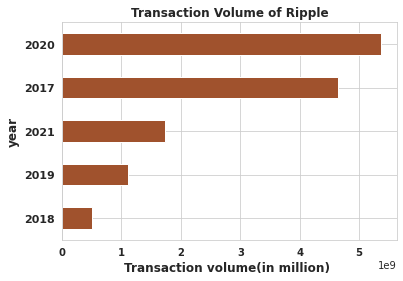

In [ ]:
ex = xrp.groupby(['Year']).last()['Volume'].sort_values(ascending=False).head(10).sort_values().plot(kind='barh', color='sienna')
#ex.set_xlabel("Transaction Volume (in million)")
plt.title("Transaction Volume of Ripple",fontweight='bold',fontsize=12) 
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')
plt.xlabel('Transaction volume(in million) ',fontsize=12, fontweight='bold')
plt.ylabel('year', fontsize=12, fontweight='bold')


In [ ]:
future5 = m4.make_future_dataframe(periods=150)
forecast5 = m4.predict(future4)
forecast5[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1659,2022-05-26,1.605733,1.290265,1.931656
1660,2022-05-27,1.606188,1.296592,1.941926
1661,2022-05-28,1.611680,1.300485,1.942090
1662,2022-05-29,1.609108,1.290784,1.939490
1663,2022-05-30,1.605439,1.299270,1.925399


Text(0.5, 1.0, 'Price prediction of Ripple  for 150 days')

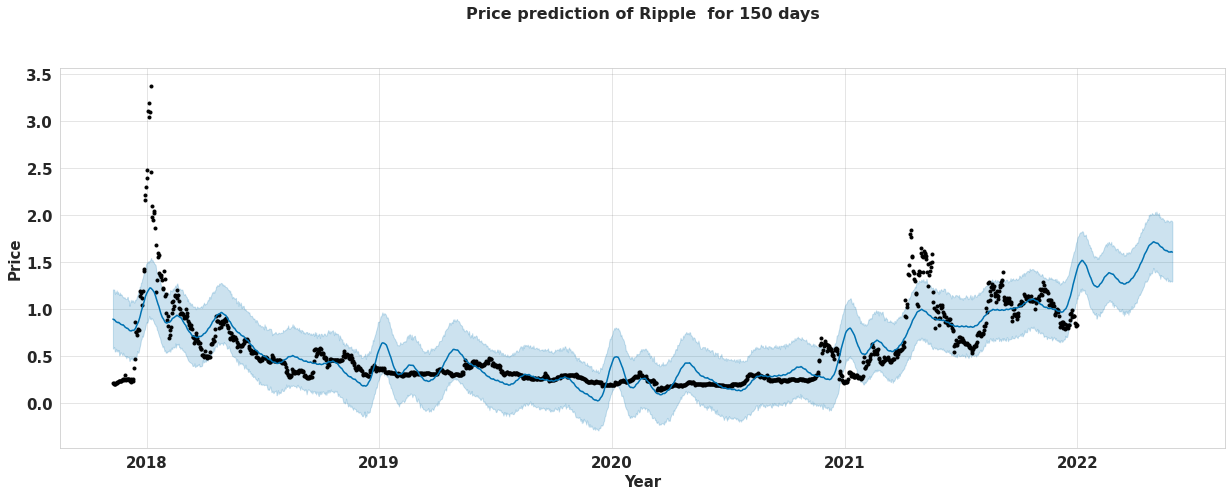

In [ ]:
figure9= m4.plot(forecast5, xlabel='Date', ylabel='Price', figsize=(17, 6), uncertainty=True, plot_cap=True)
plt.ylabel('Price',fontsize=15, fontweight='bold')
plt.xlabel('Year',fontsize=15, fontweight='bold')
plt.xticks(rotation=0,fontsize=15, fontweight='bold')
plt.yticks(rotation=0,fontsize=15, fontweight='bold')
plt.title('Price prediction of Ripple  for 150 days', fontsize=16, fontweight='bold', pad=50)

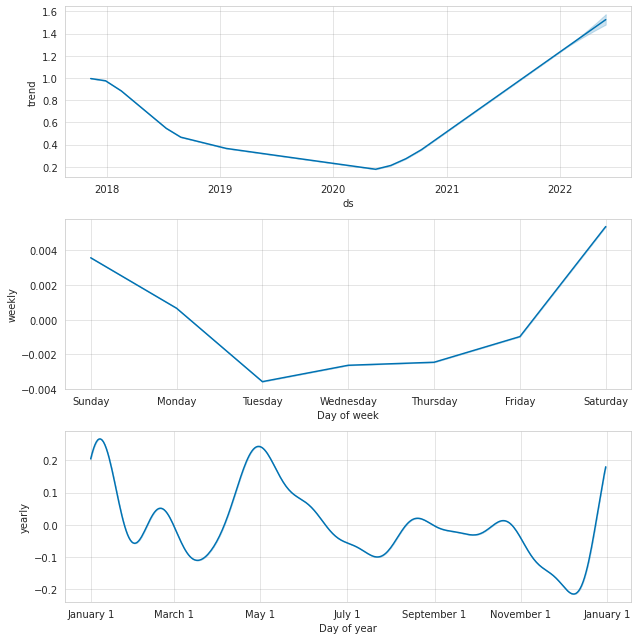

In [ ]:
figure10 = m4.plot_components(forecast5)

## Exploratory Data Analysis and Price Distributions
### Exploratory Data analysis entails the exploration of different price distributions to analyse any trends and seasonality. A Price distribution chart gives a glimpse of how the prices have been thought for the past 5 years for all cryptocurrencies.

### 1. Above Graphs shows the price distributions for all cryptocurrencies. 
### 2. As an example, Bitcoin shows peak closer to December 2017, this is when the price of Bitcoin was dollar 20,000 and skyrocketed to almost $65,000 over the last 5 years. Bitcoin(BTC) is leading the crypto market.
### 3. Similarly, The price of Ethereum (ETH) booms in late 2021.
### 4. Ripple (XRP) shows fluctuating price distributions.

---

---




---


---





---



---

## Predictive Analysis
#### 1. The reason for using Facebook prophet over other algorithms is because cryptocurrencies are very speculative and Fb prophet provides us with upper and lower limits of the predicted price which might be very helpful to investors.
#### 2. In the graphs shown above black line depicts the actual price values, while this blue line depicts the predicted price values for next 150 days while this light blue Shady area is the upper limit and the lower limit in which prices of currencies might fall.
#### 3. The predictive analysis indicates that the prices (in USD) will show a increasing trend for Bitcoin (BTC), Ethereum (ETH), Binance Coin (BNB) and Ripple (XRP) for the next 150 days of year 2022. Where as the prices (in USD) for Tether (USDT) will continue to remain stable for the next 150 days of year 2022.


In [ ]:
close=pd.DataFrame()
close['BTC Average Price']=df
close['ETH Average Price']=eth_1
close['BNB Average Price']=bnb_1
close['USDT Average Price']=usdt_1
close['XRP Average Price']=xrp_1
returns = close
returns.head()

,BTC Average Price,ETH Average Price,BNB Average Price,USDT Average Price,XRP Average Price
Year,,,,,
2017,12283.936413,532.086680,3.483209,1.010018,0.575206
2018,7572.298947,483.507727,11.172537,1.000030,0.666274
2019,7395.246282,181.770137,20.092979,1.004853,0.309701
2020,11116.378092,307.542978,21.350415,1.001316,0.258399
2021,47436.932021,2778.354149,378.304978,1.000530,0.868009


# **Correlation Analysis (Pearson Correlation)**

### Correlation attempt to discover the relationship, patterns, extensive connections, and developments among variables or datasets. There is a positive correlation among variables when an increase in a single variable, results in an increase in the other. On the other hand, a negative correlation means that after one variable increases, the other decreases and vice-versa. Pearson Correlation is one of the most popular of the correlation statistic technique

In [ ]:
closeDf18=pd.DataFrame()
closeDf18['btc']=btc['y']
closeDf18['eth']=eth['y']
closeDf18['bnb']=bnb['y']
closeDf18['usdt']=usdt['y']
closeDf18['xrp']=xrp['y']
returns18 = closeDf18
returns18.head()

,btc,eth,bnb,usdt,xrp
0,7143.580078,320.884003,1.99077,1.00818,0.217488
1,6618.140137,299.252991,1.79684,1.00601,0.206483
2,6357.600098,314.681000,1.67047,1.00899,0.210430
3,5950.069824,307.907990,1.51969,1.01247,0.197339
4,6559.490234,316.716003,1.68662,1.00935,0.203442


In [ ]:
returns18.corr()

,btc,eth,bnb,usdt,xrp
btc,1.000000,0.919925,0.915543,-0.130396,0.556861
eth,0.919925,1.000000,0.957745,-0.124896,0.661923
bnb,0.915543,0.957745,1.000000,-0.123284,0.596730
usdt,-0.130396,-0.124896,-0.123284,1.000000,-0.052896
xrp,0.556861,0.661923,0.596730,-0.052896,1.000000


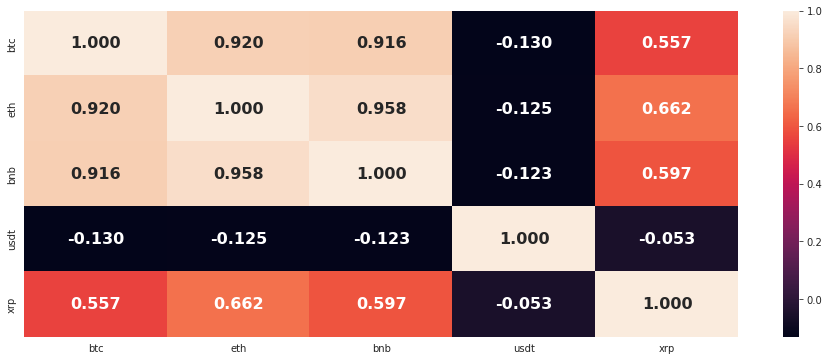

In [ ]:
def NonLinCdict(steps, hexcol_array):
    cdict = {'red': (), 'green': (), 'blue': ()}
    for s, hexcol in zip(steps, hexcol_array):
        rgb =plt.colors.hex2color(hexcol)
        cdict['red'] = cdict['red'] + ((s, rgb[0], rgb[0]),)
        cdict['green'] = cdict['green'] + ((s, rgb[1], rgb[1]),)
        cdict['blue'] = cdict['blue'] + ((s, rgb[2], rgb[2]),)
    return cdict

hc = ['#F8EDED', '#EAC8C8', '#CF7F7F', '#BA4949', '#732C2C']
th = [0, 0.1, 0.5, 0.9, 1]


plt.figure(figsize=(16,6))
sns.heatmap(returns18.corr(), annot=True, annot_kws={'fontsize': 16, 'fontfamily':'Arial', 'fontweight':'bold'}, fmt='.3f')
plt.show()

### Ether is both highly correlated with binance coin and more volatile than binance coin. To borrow the lingo of equity markets, this makes ethereum a high beta version of binance coin. When binance coin prices rise, ethereum prices tend to rise more. When binance coin prices fall, ethereum prices tend to fall even further. Correlation analysis for Bitcoin (BTC), Ethereum (ETH), Binance Coin (BNB), Tether (USDT) and Ripple (XRP) shows that all the currencies except Tether (USDT) are positively correlated to each other.

# **Risk And Returns**

In [ ]:
new =closeDf18.pct_change()
new.head(5)

,btc,eth,bnb,usdt,xrp
0,NaN,NaN,NaN,NaN,NaN
1,-0.073554,-0.067411,-0.097415,-0.002152,-0.050600
2,-0.039368,0.051555,-0.070329,0.002962,0.019115
3,-0.064101,-0.021523,-0.090262,0.003449,-0.062211
4,0.102422,0.028606,0.109845,-0.003082,0.030926


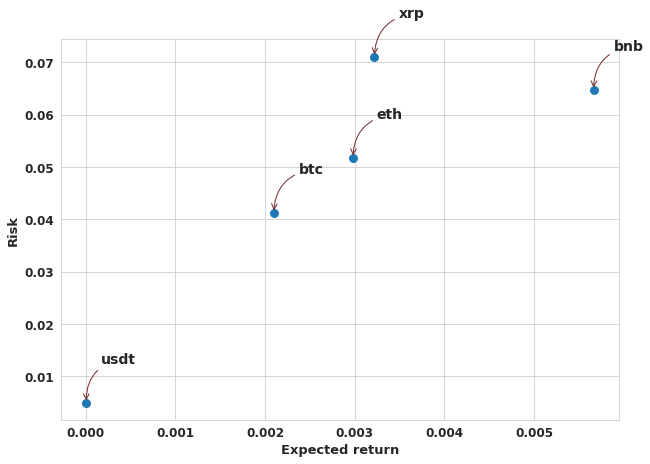

In [ ]:
rets = new.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return',fontweight='bold', fontsize=13)
plt.ylabel('Risk',fontweight='bold', fontsize=13)
plt.xticks(rotation=0,fontsize=12, fontweight='bold')
plt.yticks(rotation=0,fontsize=12, fontweight='bold')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='top', fontsize=14, fontweight='bold',
                 arrowprops=dict(arrowstyle='->', color='#732C2C', connectionstyle='arc3,rad=0.4'))

**Standard deviation helps determine market volatility or the spread of asset prices from their average price. When prices move wildly, standard deviation is high, meaning an investment will be risky. Low standard deviation means prices are calm, so investments come with low risk. From this graph we can clearly see that although Ripple had very high returns compared to any other currencies, but it is that much risky to invest money in Ripple and Binance coin as well**

### **High return comes with High risk! So, beaware of the risks**

### **Conclusion**
#### Dataset have been exploratory analysed in order to identify the trends for each of the cryptocurrencies. Line plots helps us know the movement of the price and with the application of the necessary techniques to analyse it further for the prediction. The price distribution charts are a good method of exploring the data to understand how the distributions exist within the dataset.



---



---



#### However, correlation coefficients are very handy in terms of understanding the relationships between different currencies. All cryptocurrencies were more or less correlated with each other positively or negatively. The highest positive correlation strength within all statistical models were Ethereum (ETH) and Binance Coin (BNB). Correlation analysis for Bitcoin (BTC), Ethereum (ETH), Binance Coin (BNB), Tether (USDT) and Ripple (XRP) shows that all the currencies except Tether (USDT) are positively correlated to each other. While Tether (USDT) is negatively correlated the currencies. This helps us understand that the price movements across cryptocurrencies are somewhat correlated with each other and hence they follow a similar trend when moving upwards or downwards. Correlation analysis gives valuable information on relationships of variables hence This data can be used for example, to take advantage of changing market.


---



---



#### **Bitcoin is leading the market. Bitcoin is probably the best-known cryptocurrency, and its value has been skyrocketed in recent years. Ethereum is another popular cryptocurrency worth looking into, as its value has been steadily increasing over the past. Ripple is another exciting option that could potentially see a lot of growth in 2022.**